In [13]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import commonfunctions as cf
from commonfunctions import *
import cv2
import numpy as np
from sklearn import *
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin

from functions import *
from sklearn.metrics import accuracy_score


digits = datasets.load_digits()

In [14]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [15]:
import os
from os import listdir

In [16]:
target = []
for i in range (2):
    for j in range (54):
        target.append(chr(ord('0')+i))

for i in range (6):
    for j in range (54):
        target.append(chr(ord('A')+i))

target = np.array(target)
print(target.shape)

(432,)


In [17]:
dataset = []
#load dataset
folder_dir = "./datasets/ImgCopy"
for image in os.listdir(folder_dir):
    dataset.append(cv2.cvtColor(cv2.imread(folder_dir+'/'+image), cv2.COLOR_BGR2GRAY))

In [18]:
dataset = np.array(dataset)

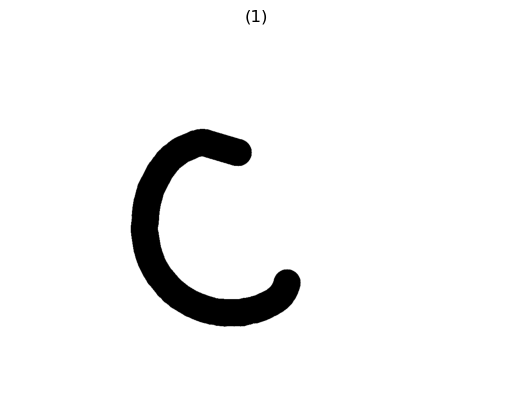

In [19]:
show_images([dataset[266]])

2926.5
992168.0


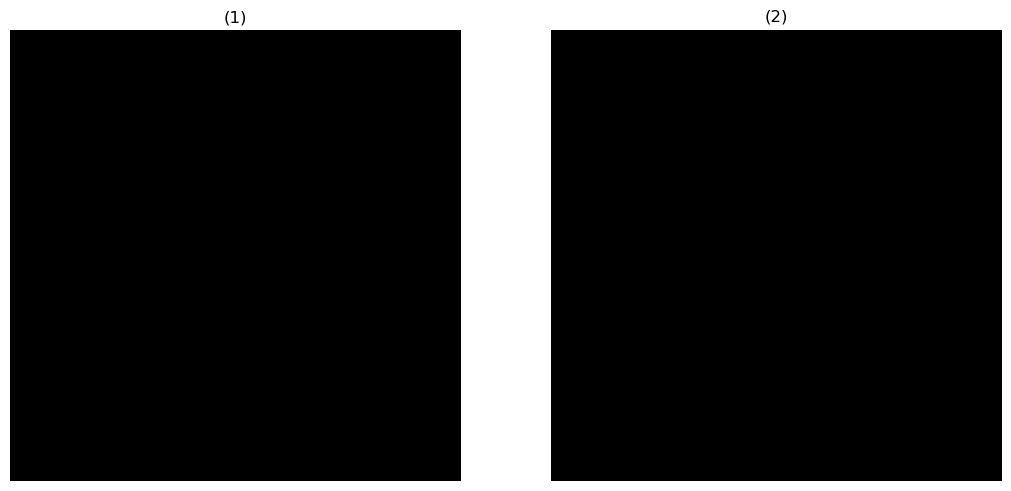

In [20]:
show_images(get_letters(cv2.cvtColor(cv2.imread('./datasets/Img/img005-047.png'), cv2.COLOR_BGR2GRAY)))

In [21]:
training_set = []
for i in range(len(dataset)):
    if(i%55 != 0):
        temp = get_letters(dataset[i])
        if(len(temp) != 0):
            training_set.append(temp[0])
        else:
         target = np.delete(target,i)
        # print(i)

44764.5
141565.0
1077901.0
187935.5
312119.0
1077901.0
17569.5
65101.5
1077901.0
30060.0
87157.0
1077901.0
4311.0
43662.0
1077901.0
1902.5
28832.0
1077901.0
19620.0
69849.5
1077901.0
180548.5
298308.0
1077901.0
11592.5
53914.0
1077901.0
3409.5
32732.0
1077901.0
73564.5
154705.5
1077901.0
7144.5
43084.5
1077901.0
113346.0
210504.5
1077901.0
55000.5
127924.5
1077901.0
9749.5
48858.5
1077901.0
90035.0
178536.0
1077901.0
22805.5
76040.5
1077901.0
33703.0
94121.0
1077901.0
5784.5
43108.5
1077901.0
27703.5
83831.0
1077901.0
10662.0
51782.0
1077901.0
79797.0
165255.0
1077901.0
27195.5
81416.0
1077901.0
57769.5
130713.5
1077901.0
57566.0
136684.5
1077901.0
31375.0
90739.0
1077901.0
25141.5
78841.0
1077901.0
11696.5
52975.0
1077901.0
28658.5
87837.0
1077901.0
44804.0
113045.0
1077901.0
12710.5
58132.0
1077901.0
32133.0
89909.0
1077901.0
6079.5
40903.0
1077901.0
12374.0
56086.5
1077901.0
59476.5
137362.0
1077901.0
66304.0
146084.0
1077901.0
114221.0
210274.5
1077901.0
4371.5
38704.5
1077901.0
21

In [22]:
print(len(training_set))
print(len(target))

432
432


In [23]:
#classifier
clf = svm.SVC(gamma = 0.001, C =100)

In [24]:
print(training_set.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
nsamples, nx, ny = training_set.shape
training_set_2 = training_set.reshape((nsamples,nx*ny))

In [ ]:
print(training_set_2.shape)

(432, 784)


In [ ]:
#Loads in all but the last 10 points to use them for testing
# X,y = digits.data[:], digits.target[:]
X,y = training_set_2, target

In [ ]:
#Train 
clf.fit(X,y)

SVC(C=100, gamma=0.001)

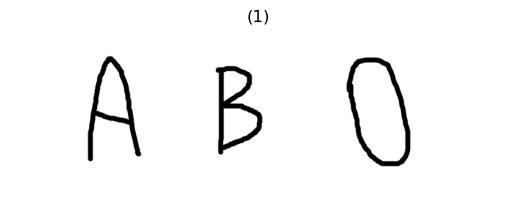

In [ ]:
letter = cv2.cvtColor(cv2.imread('./test_images/classification/ab0.png'), cv2.COLOR_BGR2GRAY)
y_true = ['A', 'B', '0']
show_images([letter])

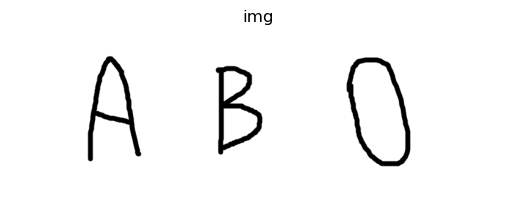

6957.0
13675.0
6262.0


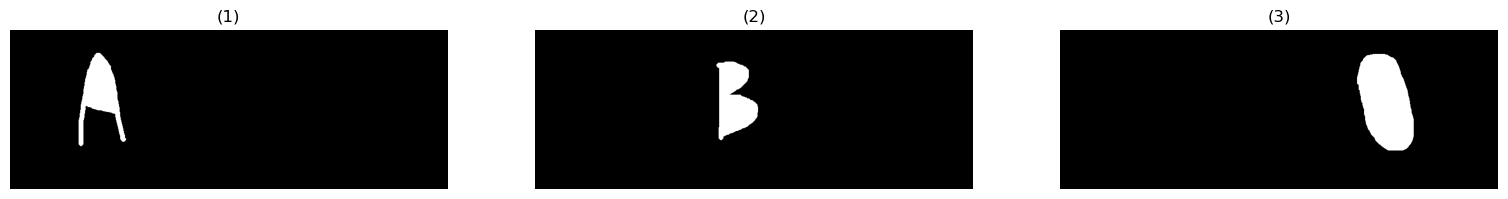

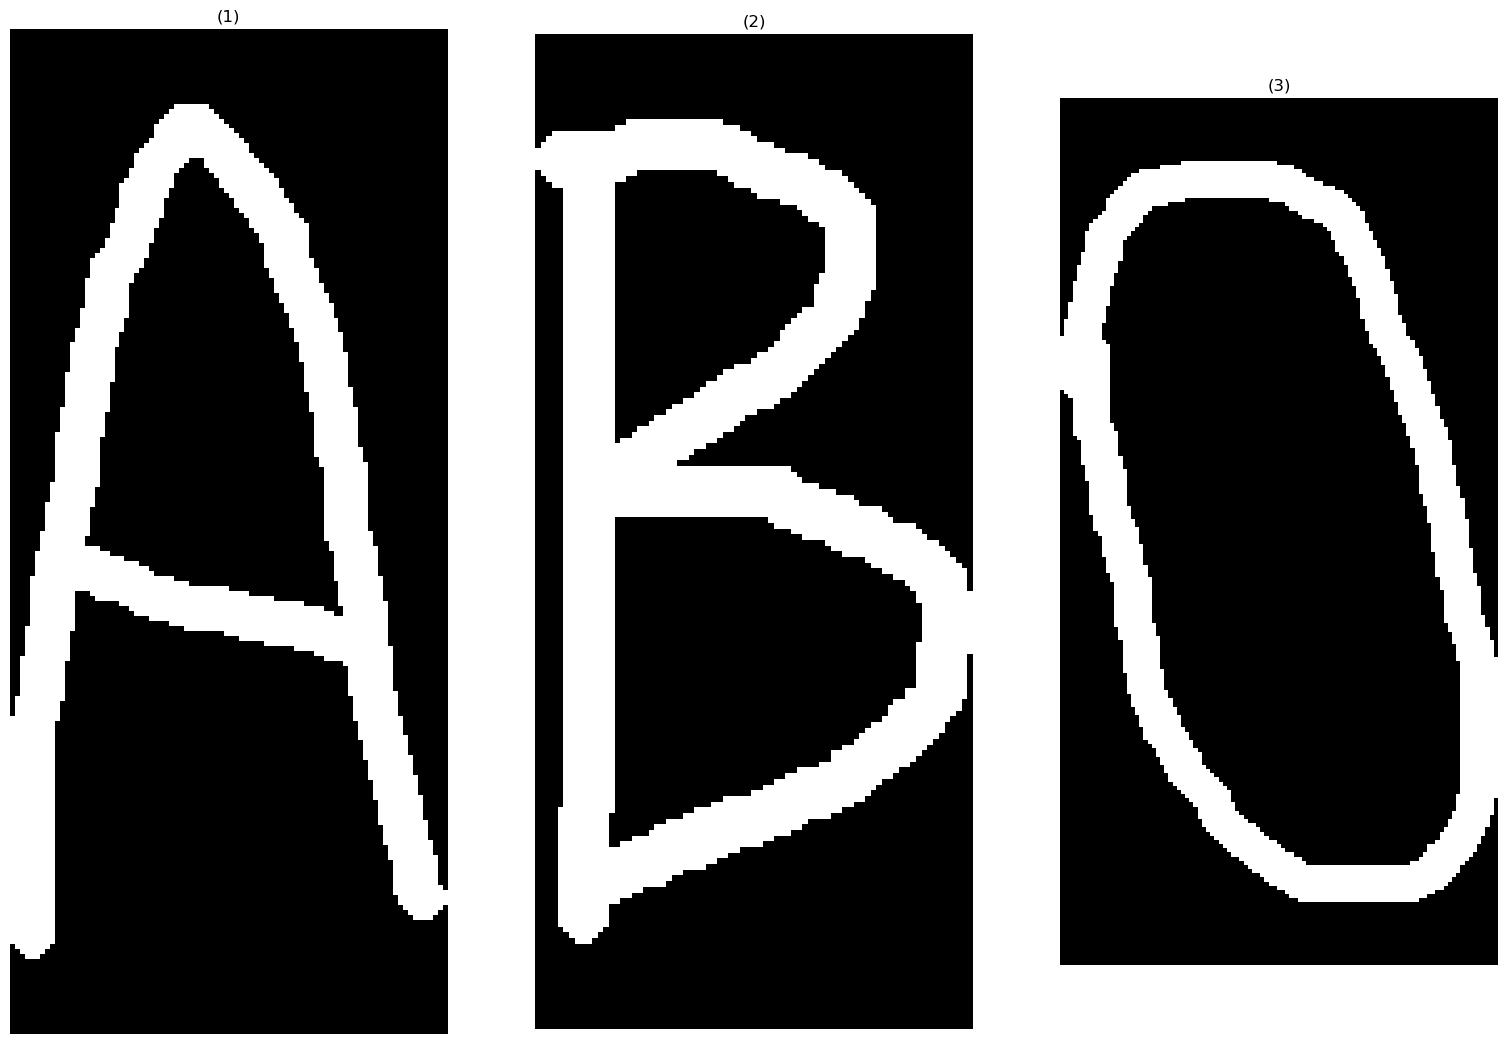

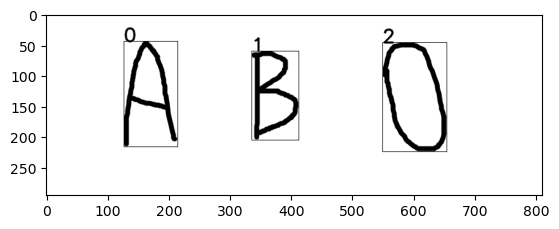

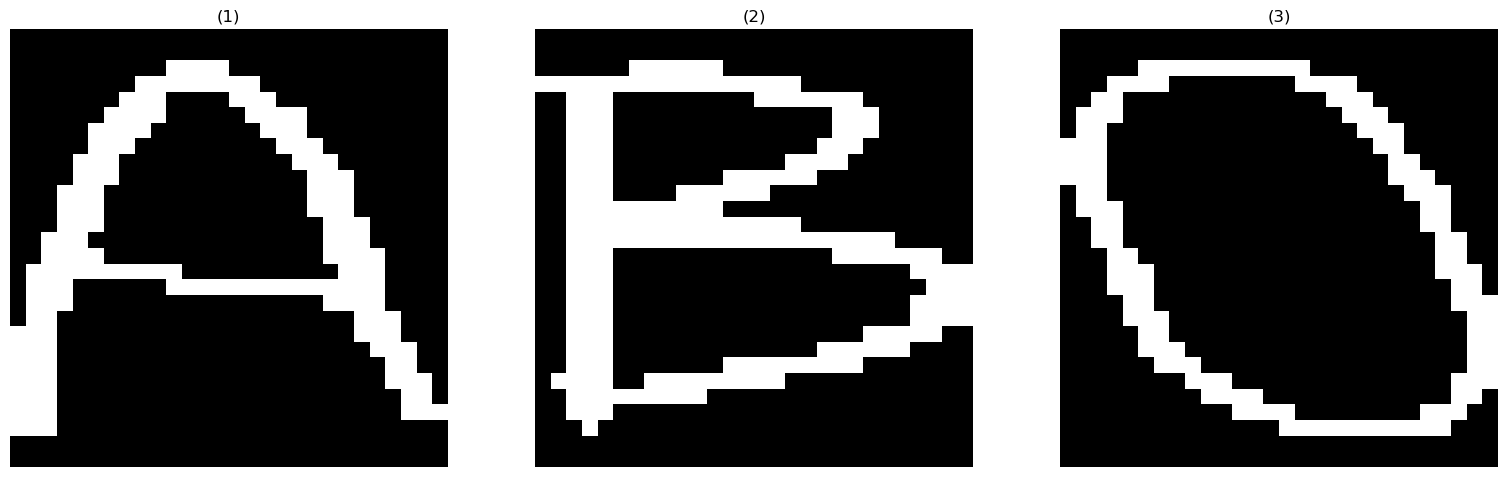

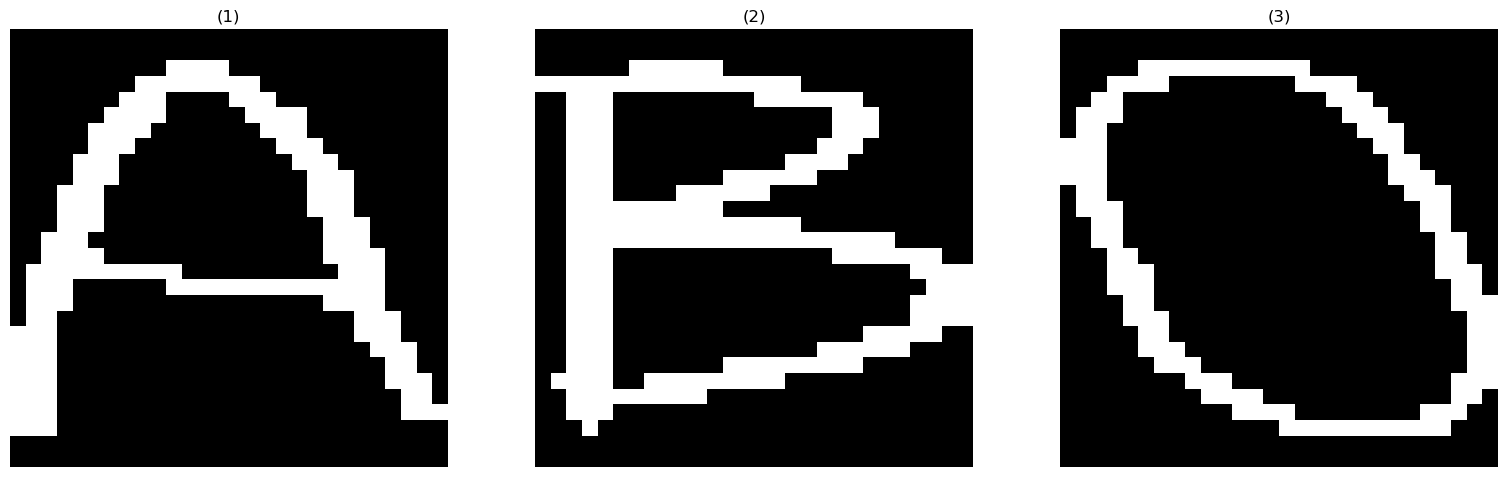

In [ ]:
letter = get_letters(letter,show_trace=True)
show_images(letter)

In [ ]:
letter = np.array(letter)
letter2 =[]
for i in range (len(letter)):
    letter2.append( letter[i].reshape(28*28))
letter2= np.array(letter2)
print(letter2.shape)


(3, 784)


In [ ]:
y_predict =clf.predict(letter2) 
print(y_predict)

['A' 'B' 'D']


In [ ]:
accuracy_score(y_true, y_predict)

0.6666666666666666

In [ ]:
test_set = []
y_true = []
i = 0
while i <len(dataset):
    test_set.append(get_letters(dataset[i]))
    y_true.append(target[i])
    i += 55
    
test_set_2 = []
test_set = np.array(test_set)
y_true = np.array(y_true)
for i in range (len(test_set)):
    # print('before', test_set[i].shape)
    test_set_2.append( test_set[i].reshape(28*28))
test_set_2= np.array(test_set_2)
print(test_set_2.shape)
print(test_set.shape)
print(y_true.shape)

188714.5
52779.0
109099.5
141468.5
88436.5
177631.0
120662.5
95318.5
(8, 784)
(8, 1, 28, 28)
(8,)


In [ ]:
y_predict =clf.predict(test_set_2) 
print(y_predict)
accuracy_score(y_true, y_predict)

['0' '1' 'A' 'B' 'C' 'D' 'E' 'F']


1.0